In [13]:
from prophet import Prophet
import pandas as pd
%matplotlib inline

In [14]:
import matplotlib.pyplot as plt

In [15]:
plt.style.use("dark_background")

In [2]:
from datapipeline import DataPipes

In [9]:
n_future=24

In [3]:
self = DataPipes()

****************************************************************************************************
Downloading: GDP
****************************************************************************************************
****************************************************************************************************
Downloading: HenryHub Natural Gas
****************************************************************************************************
****************************************************************************************************
Downloading: Fertilizer Production
****************************************************************************************************
****************************************************************************************************
Downloading: ExchangeRate USD/EUR
****************************************************************************************************
************************************************************************

In [4]:
df = self.get_fertilizer_production

In [5]:
df.reset_index(inplace=True)

In [6]:
df.rename(columns={'Date':'ds','Value':'y'},inplace=True)

In [7]:
model = Prophet()

In [8]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.61159


/opt/anaconda3/envs/cptx/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2211.77    0.00430865        243.51      0.8943      0.8943      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2228.36   0.000923038       128.635       1.405      0.1405      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       2230.47   0.000394925       220.076   4.625e-06       0.001      377  LS failed, Hessian reset 
     299       2230.82   0.000830058       66.1638           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2234.43     0.0036344       111.296           1           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     475       2236.41   0.000163483        113.77   2.018e-06       0.001      6

In [10]:
future_df = model.make_future_dataframe(periods=n_future,freq='M')
display(future_df)

,ds
0,1961-01-01
1,1961-02-01
2,1961-03-01
3,1961-04-01
4,1961-05-01
...,...
763,2024-07-31
764,2024-08-31
765,2024-09-30
766,2024-10-31


In [11]:
forecast_df = model.predict(future_df)
display(forecast_df)

/opt/anaconda3/envs/cptx/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/envs/cptx/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-01,2.951208e+07,2.244293e+07,4.067190e+07,2.951208e+07,2.951208e+07,2.277969e+06,2.277969e+06,2.277969e+06,2.277969e+06,2.277969e+06,2.277969e+06,0.0,0.0,0.0,3.179005e+07
1,1961-02-01,2.990458e+07,2.234122e+07,4.088164e+07,2.990458e+07,2.990458e+07,2.008327e+06,2.008327e+06,2.008327e+06,2.008327e+06,2.008327e+06,2.008327e+06,0.0,0.0,0.0,3.191291e+07
2,1961-03-01,3.025910e+07,2.153216e+07,4.111955e+07,3.025910e+07,3.025910e+07,1.164782e+06,1.164782e+06,1.164782e+06,1.164782e+06,1.164782e+06,1.164782e+06,0.0,0.0,0.0,3.142388e+07
3,1961-04-01,3.065160e+07,2.219295e+07,4.104480e+07,3.065160e+07,3.065160e+07,9.097506e+05,9.097506e+05,9.097506e+05,9.097506e+05,9.097506e+05,9.097506e+05,0.0,0.0,0.0,3.156135e+07
4,1961-05-01,3.103144e+07,2.170396e+07,4.075644e+07,3.103144e+07,3.103144e+07,6.712766e+05,6.712766e+05,6.712766e+05,6.712766e+05,6.712766e+05,6.712766e+05,0.0,0.0,0.0,3.170271e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2024-07-31,2.593013e+08,2.495127e+08,2.685669e+08,2.589028e+08,2.597567e+08,-3.698285e+05,-3.698285e+05,-3.698285e+05,-3.698285e+05,-3.698285e+05,-3.698285e+05,0.0,0.0,0.0,2.589314e+08
764,2024-08-31,2.597981e+08,2.493925e+08,2.689693e+08,2.593495e+08,2.602734e+08,-6.018471e+05,-6.018471e+05,-6.018471e+05,-6.018471e+05,-6.018471e+05,-6.018471e+05,0.0,0.0,0.0,2.591962e+08
765,2024-09-30,2.602788e+08,2.499210e+08,2.688117e+08,2.597759e+08,2.608272e+08,-7.019302e+05,-7.019302e+05,-7.019302e+05,-7.019302e+05,-7.019302e+05,-7.019302e+05,0.0,0.0,0.0,2.595769e+08
766,2024-10-31,2.607756e+08,2.503095e+08,2.700340e+08,2.602357e+08,2.613810e+08,-7.527625e+05,-7.527625e+05,-7.527625e+05,-7.527625e+05,-7.527625e+05,-7.527625e+05,0.0,0.0,0.0,2.600229e+08


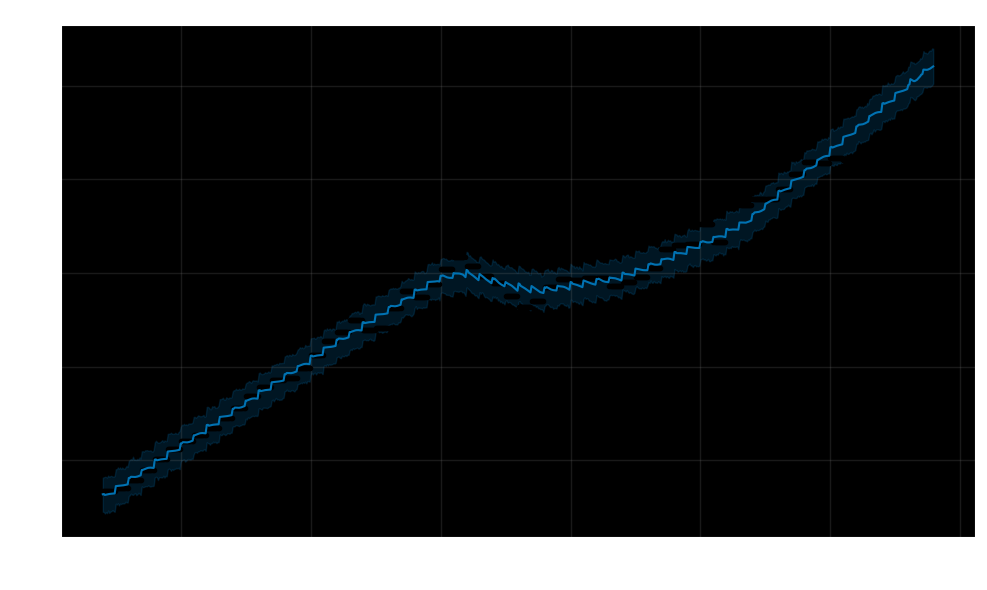

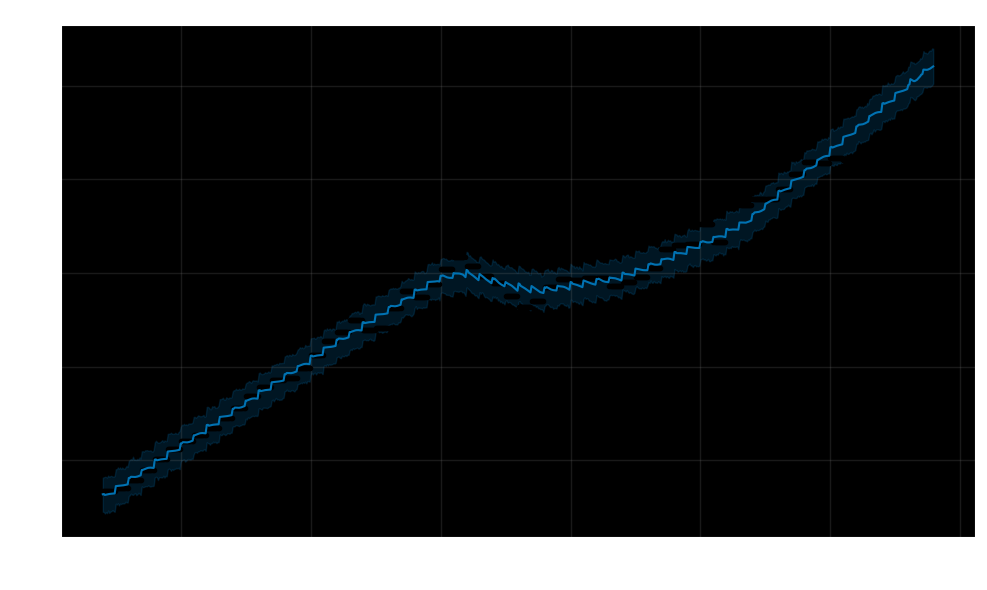

In [16]:
model.plot(forecast_df)

/opt/anaconda3/envs/cptx/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


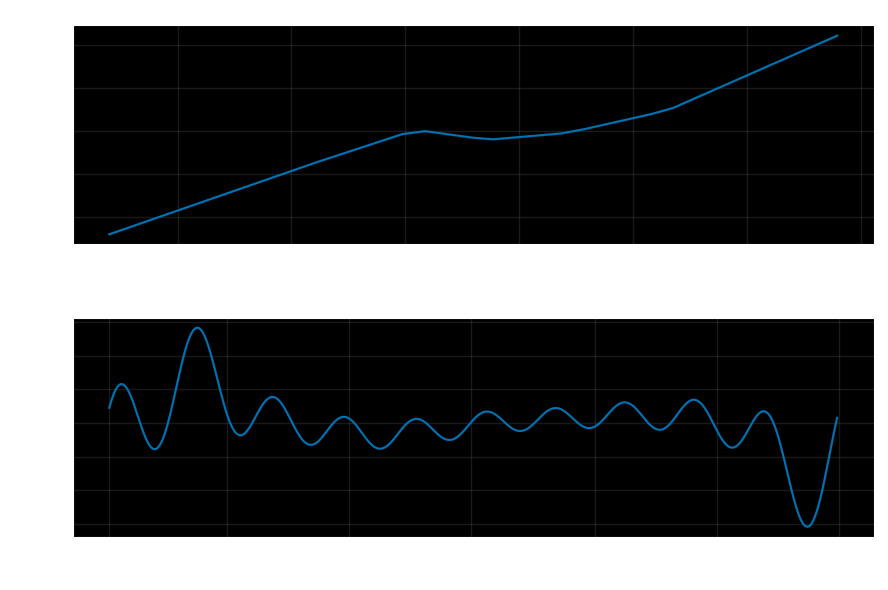

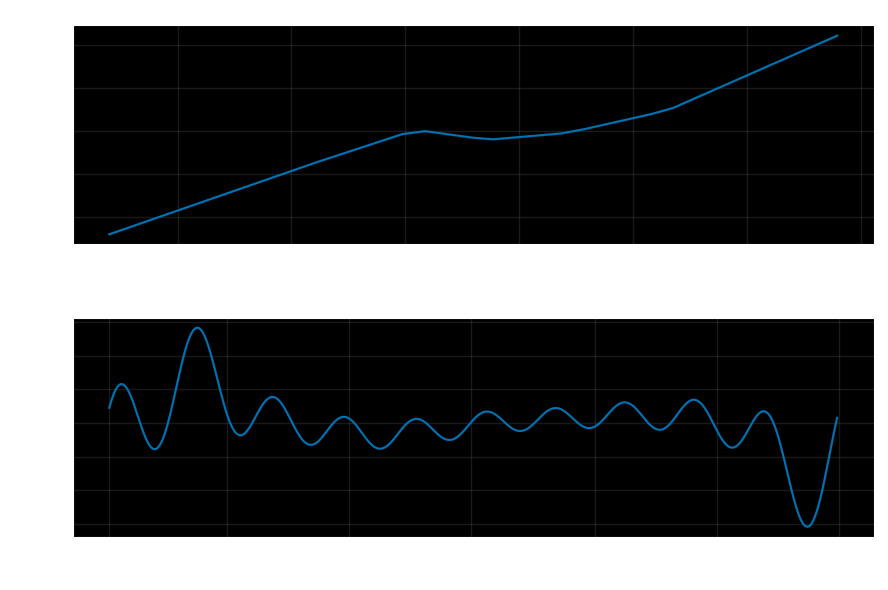

In [18]:
model.plot_components(forecast_df)

In [20]:
forecast_df[['ds','yhat_lower','yhat','yhat_upper']]

,ds,yhat_lower,yhat,yhat_upper
0,1961-01-01,2.244293e+07,3.179005e+07,4.067190e+07
1,1961-02-01,2.234122e+07,3.191291e+07,4.088164e+07
2,1961-03-01,2.153216e+07,3.142388e+07,4.111955e+07
3,1961-04-01,2.219295e+07,3.156135e+07,4.104480e+07
4,1961-05-01,2.170396e+07,3.170271e+07,4.075644e+07
...,...,...,...,...
763,2024-07-31,2.495127e+08,2.589314e+08,2.685669e+08
764,2024-08-31,2.493925e+08,2.591962e+08,2.689693e+08
765,2024-09-30,2.499210e+08,2.595769e+08,2.688117e+08
766,2024-10-31,2.503095e+08,2.600229e+08,2.700340e+08


In [26]:
forecast_df[forecast_df.ds>=df.iloc[df.index[-1]].ds][['ds','yhat_lower','yhat','yhat_upper']]

,ds,yhat_lower,yhat,yhat_upper
743,2022-12-01,2.390677e+08,2.482747e+08,2.581352e+08
744,2022-12-31,2.406324e+08,2.504908e+08,2.602780e+08
745,2023-01-31,2.411473e+08,2.507503e+08,2.603855e+08
746,2023-02-28,2.441083e+08,2.535968e+08,2.630102e+08
747,2023-03-31,2.439630e+08,2.532426e+08,2.628930e+08
748,2023-04-30,2.434304e+08,2.528420e+08,2.624398e+08
749,2023-05-31,2.428438e+08,2.525719e+08,2.625101e+08
750,2023-06-30,2.423812e+08,2.525567e+08,2.616628e+08
751,2023-07-31,2.429096e+08,2.528810e+08,2.621792e+08
752,2023-08-31,2.445238e+08,2.532491e+08,2.626068e+08
